In [38]:
import pandas as pd
data = pd.read_csv("/mydata/skew_data/1_5_postgres.csv")
data = data[data["x"] < 1000]
data.describe()

,x,page_id
count,1.756401e+08,1.756401e+08
mean,2.424342e+01,3.982299e+05
std,8.764248e+01,2.299148e+05
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.991220e+05
50%,2.000000e+00,3.982320e+05
75%,8.000000e+00,5.973390e+05
max,9.990000e+02,7.964600e+05


(array([1.66246272e+08, 4.01835700e+06, 1.78152300e+06, 1.06440600e+06,
        7.20654000e+05, 5.38998000e+05, 4.18424000e+05, 3.36825000e+05,
        2.79129000e+05, 2.35496000e+05]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <BarContainer object of 10 artists>)

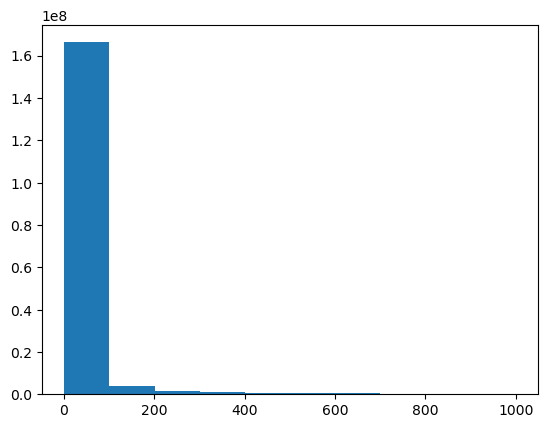

In [39]:
import matplotlib.pyplot as plt
plt.hist(data["x"])

In [40]:
import scipy.stats
avg_x = data["x"].mean()
std_x = data["x"].std()
sample_size_fn = lambda e: (scipy.stats.norm.ppf(0.975) * std_x / avg_x / e) **2
avg_x, std_x, sample_size_fn(0.05)

(24.243423881532646, 87.64247990166137, 20081.56609269586)

In [41]:
grouping = data.groupby("page_id").agg({"x": ["size", "sum"]})
page_sums = grouping["x"]["sum"]
page_sizes = grouping["x"]["size"]

In [42]:
page_sum_mean = page_sums.mean()
page_sum_std = page_sums.std()
sample_page_size_fn = lambda e: (scipy.stats.norm.ppf(0.975) * page_sum_std / page_sum_mean / e) **2
page_sum_mean, page_sum_std, sample_page_size_fn(0.1)

(5346.296939837606, 1301.5321362457787, 22.766686166275576)

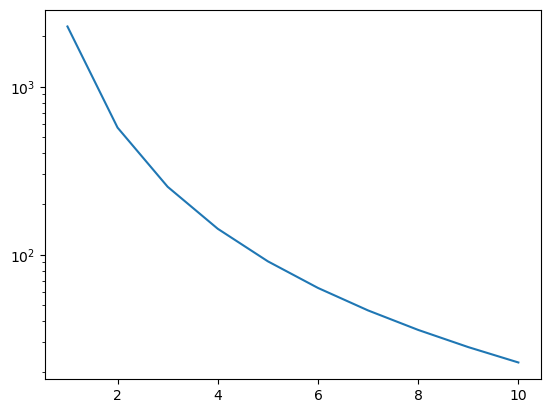

In [43]:
x = [0.01 * i for i in range(1, 11)]
y = [sample_page_size_fn(e) for e in x]
x = [e*100 for e in x]
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.yscale("log")

In [44]:
page_size_mean = page_sizes.mean()
page_size_std = page_sizes.std()
sample_page_size_fn = lambda e: (scipy.stats.norm.ppf(0.975) * page_size_std / page_size_mean / e) **2
page_size_mean, page_size_std, sample_page_size_fn(0.1)

(220.5256553679339, 2.317044508160043, 0.04240789263536657)